In [184]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

In [195]:
#Fast pulse definition
def FastPulse(w0, gamma, alphap, delta, area, t):
    
    E_0 = area/np.sqrt(2*np.pi) #Amplitud --- Area of pure gaussian pulse: sqrt(2*pi)

    #Pulse with chirp and Noch
    g1 = np.exp(-.5*((t**2)*(gamma**(-2)+1j*alphap)/(gamma**(-4)+alphap**2) + 2j*w0*t))/np.sqrt(gamma**(-2)-1j*alphap)
    g2 = np.exp(-.5*((t**2)*(gamma**(-2)+delta**(-2)+1j*alphap)/((gamma**(-2)+delta**(-2))**2+alphap**2) + 2j*w0*t))/np.sqrt(gamma**(-2)+delta**(-2)-1j*alphap)
    
    return E_0*(g1-g2)

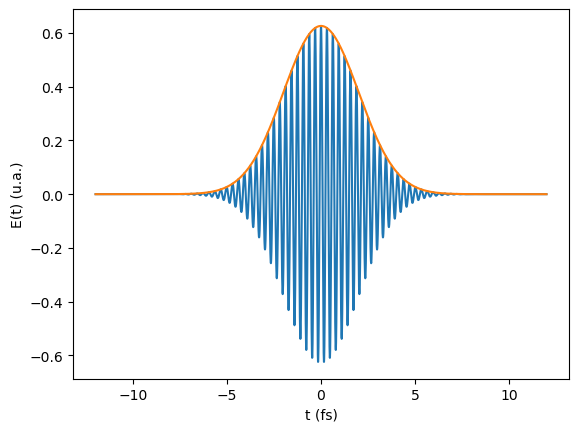

In [199]:
#Parameters
w0 = 20             #Central frecuency
area = np.pi        #Area of pure gaussian pulse
gamma = .5          #Spectral width
alphap = 0          #Chrip constant
delta = 1e-10       #Noch spectral width




#plot
T = 3*((1+(alphap**2)*gamma**4)/gamma**2)
time = np.linspace(-T, T, 10000)
pulse = FastPulse(w0, gamma, alphap, delta, area, time)

plt.plot(time, np.real(pulse))      #real part of the pulse
plt.plot(time, np.abs(pulse))       #Envelope

plt.xlabel('t (fs)')
plt.ylabel('E(t) (u.a.)')

plt.show()


In [197]:
#Pulse area
quad(lambda t: np.abs(FastPulse(w0, gamma, alphap, delta, np.pi, t)), -np.inf, np.inf)[0]

3.1415926464717607

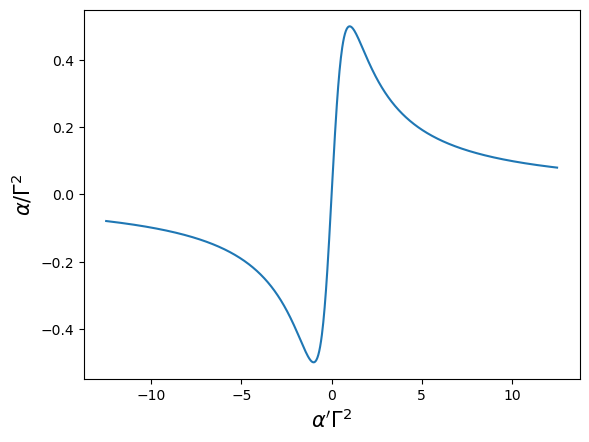

In [210]:
#Chrip alpha as a function of the chrip parameter alpha prime
def alpha(alphap): return alphap/(gamma**(-4)+alphap**2)

alphap = np.linspace(-50, 50, 1000)
plt.plot(alphap*gamma**2, alpha(alphap)/gamma**2)

plt.xlabel(r"$\alpha'\Gamma^2$", size=15)
plt.ylabel(r'$\alpha/\Gamma^2$', size=15)

plt.show()